<a href="https://colab.research.google.com/github/baby-developer/10DaysOfML/blob/master/Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task For Day 1
Day1:
Machine Learning Tools - Numpy, Pandas, Matplotlib 
- Numpy Documentation: https://numpy.org/devdocs/
- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib: https://matplotlib.org/contents.html

Dataset link: https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv

Task: 
- Processed the data: On a particular date, If 70% number of confirmed case is zero, then Delete the column. i.e. whole February will be deleted and few more.
- Plot the data like:
 - Country wise like (select any one date)
   - x: country
   - y: number of case
 - Date wise (select any country)
   - x: Date
   - y: number of case
 - Continent wise (select any date)
   - x: set of country (Asia, Europe, America etc)
   - y: number of case

# Importing Libraries 

In [0]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Dataset and reading it via Pandas

In [0]:
upload = files.upload()

Saving time_series_2019-ncov-Confirmed.csv to time_series_2019-ncov-Confirmed.csv


In [0]:
dataSet = pd.read_csv('time_series_2019-ncov-Confirmed.csv')

In [211]:
dataSet.head(20)

,Province/State,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
5,British Columbia,Canada,49.2827,-123.1207,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231,271,424,424
6,New South Wales,Australia,-33.8688,151.2093,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,533
7,Victoria,Australia,-37.8136,144.9631,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,296
8,Queensland,Australia,-28.0167,153.4000,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,221
9,NaN,Cambodia,11.5500,104.9167,1,1,1,1,2,2,2,3,3,5,7,7,7,33,35,37,51,53,84


# Deleting Columns 

In [212]:
dates_cols = dataSet.select_dtypes('int64')
dates = dates_cols.columns

for date in dates:
  zero_percent = dates_cols[date].value_counts(normalize=True) * 100 
  zero_percent = zero_percent.loc[zero_percent.index.isin([0])].array
  if (zero_percent[0]) > 70:
    dataSet = dataSet.drop([date],axis=1)

print("If 70% number of confirmed case is zero")
dataSet.columns


If 70% number of confirmed case is zero


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

# Country wise plot

In [289]:
plotData = dataSet.groupby(['Country/Region'])['3/22/20'].sum()
cases = []
names = []
i=0
other=0
for value in plotData.values:
  if(value > 7000):
    cases.append(plotData[i])
    names.append(plotData.index[i])
  else:
    other=other+plotData[i]
  i=i+1
cases.append(other)
names.append('Others')
print(cases)
print(names)


[81397, 16176, 24873, 21638, 59138, 8897, 28768, 7245, 33272, 54551]
['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, South', 'Spain', 'Switzerland', 'US', 'Others']


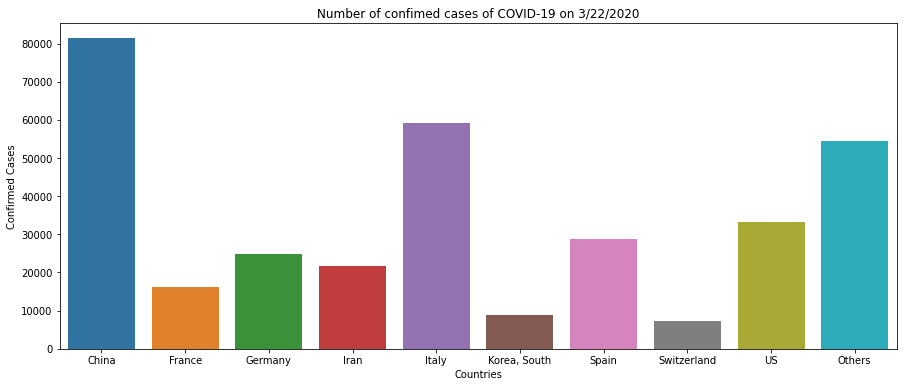

In [291]:
plt.figure(figsize=(15,6))
plt.title("Number of confimed cases of COVID-19 on 3/22/2020")
plt.xlabel("Countries")
plt.ylabel("Confirmed Cases")
sns.barplot(x=names,y=cases)

# Date Wise Plot

In [332]:
dates

Index(['3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [0]:

datePlotSet = dataSet.drop(['Province/State','Lat','Long'],axis=1)
t1 = datePlotSet.groupby('Country/Region')['3/4/20'].sum()
t1['China']
sums = []
for plotDate in dates:
  t1 = datePlotSet.groupby('Country/Region')[plotDate].sum()
  sums.append(t1['US'])




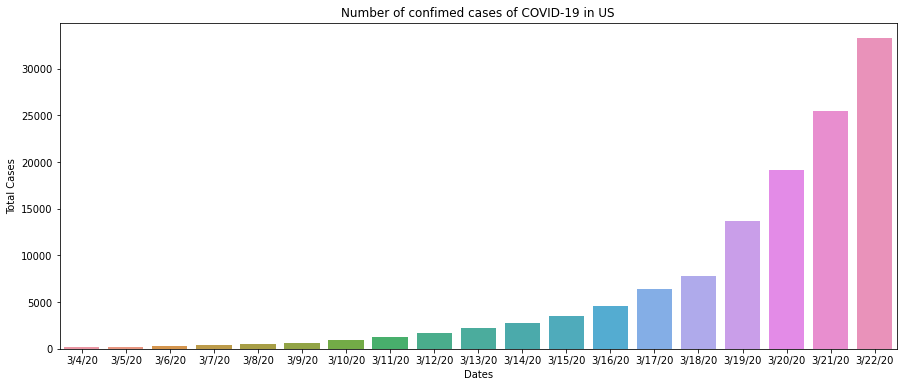

In [338]:
plt.figure(figsize=(15,6))
plt.title("Number of confimed cases of COVID-19 in US")
plt.xlabel("Dates")
plt.ylabel("Total Cases")
sns.barplot(x=dates,y=sums)

# Continent Wise